In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
session = pd.read_csv('../../airbnb_project_data/sessions.csv')
session.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

In [4]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [12]:
test = pd.read_csv('test_users.csv')
test.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [93]:
train = pd.read_csv('train_users_2.csv')
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [61]:
train.gender.replace('-unknown-', np.nan, inplace=True)
train.loc[train.age > 95, 'age'] = np.nan
train.loc[train.age < 18, 'age'] = np.nan

In [17]:
train_nan = (train.isnull().sum() / train.shape[0]) * 100
train_nan[train_nan > 0]

date_first_booking         58.347349
gender                     44.829024
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

       country_destination
NDF                 124543
US                   62376
other                10094
FR                    5023
IT                    2835
GB                    2324
ES                    2249
CA                    1428
DE                    1061
NL                     762
AU                     539
PT                     217


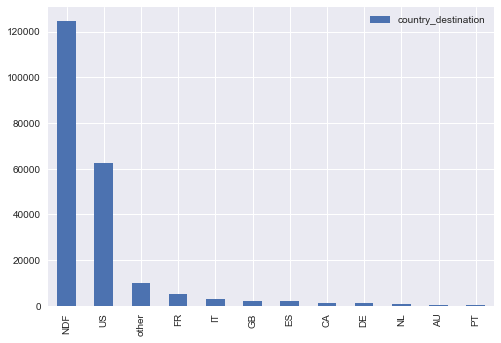

In [54]:
country_dis = pd.DataFrame(train.country_destination.value_counts())
print(country_dis)
country_dis.plot(kind='bar')

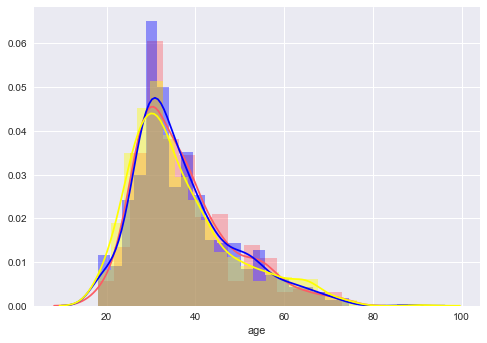

In [72]:
au = train[train.country_destination == 'AU']
ca = train[train.country_destination == 'CA']
de = train[train.country_destination == 'DE']
#es = a.ES
#fr = a.FR
#gb = a.GB
#it = a.IT
#ndf = a.NDF
#nl = a.NL
#pt = a.PT
#us = a.US
#other = a.other
sns.distplot(au.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
sns.distplot(ca.age.dropna(), color='blue')
sns.distplot(de.age.dropna(), color='yellow')

In [94]:
date = train.date_account_created
year = []
month = []
day = []
for i in date:
    y, m, d = i.split('-')
    year.append(y)
    month.append(m)
    day.append(d)

In [95]:
train['account_create_year'] = year
train['account_create_month'] = month
train['account_create_day'] = day

In [96]:
date2 = train.date_first_booking
year2 = []
month2 = []
day2 = []
for i in date2:
    if type(i) == float:
        y = m = d = np.nan
    else:
        y, m, d = i.split('-')
    year2.append(y)
    month2.append(m)
    day2.append(d)

In [97]:
date2.value_counts(dropna = False)[0]

124543

In [98]:
a = 0
for i in date2:
    if type(i) != float:
        pass
    else:
        a += 1
a

124543

In [99]:
np.nan == np.nan

False

In [100]:
train['first_booking_year'] = year2
train['first_booking_month'] = month2
train['first_booking_day'] = day2

In [106]:
train.gender.replace('-unknown-', 'Nan', inplace=True)
train.gender.replace('OTHER', 'Nan', inplace=True)
a = train.groupby(['gender', 'country_destination']).size().unstack(0)

In [107]:
a

gender,FEMALE,MALE,Nan
country_destination,,,
AU,207,188,144
CA,455,477,496
DE,358,416,287
ES,853,677,719
FR,1962,1335,1726
GB,881,682,761
IT,1091,699,1045
NDF,31048,26719,66776
NL,254,278,230


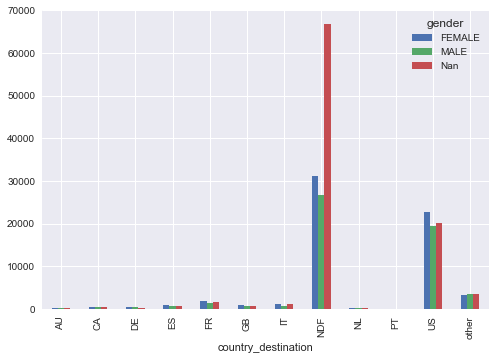

In [108]:
a.plot(kind='bar')

In [110]:
train.gender.value_counts()

Nan       95970
FEMALE    63041
MALE      54440
Name: gender, dtype: int64